# 2020 - NCAAM Predictions (March Madness 2020)

In [231]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
import re
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import itertools

In [232]:
# warnings.filterwarnings('ignore')
# pd.options.display.max_columns = 20
# pd.options.display.max_rows = 30

filepath = r"D:/code/Data/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/"

df_2015 = pd.read_csv(f'{filepath}MEvents2015.csv')
df_2016 = pd.read_csv(f'{filepath}MEvents2016.csv')
df_2019 = pd.read_csv(f'{filepath}MEvents2019.csv')
df_results_detailed = pd.read_csv(f'{filepath}/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
df_results_compact = pd.read_csv(f'{filepath}/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
teams = pd.read_csv(f'{filepath}/MDataFiles_Stage1/MTeams.csv')

In [233]:
# Everything that happened in the game
df_2016

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,2560826,2016,11,1104,1244,77,64,0,0,13,1104,151,miss2,lay,0,0,0
1,2560827,2016,11,1104,1244,77,64,0,0,13,1104,151,reb,off,0,0,0
2,2560828,2016,11,1104,1244,77,64,0,0,16,1244,5199,foul,unk,0,0,0
3,2560829,2016,11,1104,1244,77,64,0,0,16,1104,151,miss1,unk,0,0,0
4,2560830,2016,11,1104,1244,77,64,0,0,16,1104,0,reb,deadb,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655857,5216683,2016,152,1437,1328,95,51,0,0,2353,1437,12365,turnover,unk,0,0,0
2655858,5216684,2016,152,1437,1328,95,51,0,0,2354,1328,8248,steal,NaN,0,0,0
2655859,5216685,2016,152,1437,1328,95,51,0,0,2361,1328,8233,turnover,unk,0,0,0
2655860,5216686,2016,152,1437,1328,95,51,0,0,2362,1437,12365,steal,NaN,0,0,0


In [234]:
# Final stats of the game
df_results_compact

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


In [253]:
df_results_detailed

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,21,12,21,11,30,14,14,5,5,19
1111,2019,146,1277,68,1181,67,N,0,30,70,...,21,8,13,13,29,14,17,4,9,9
1112,2019,152,1403,61,1277,51,N,0,22,51,...,24,14,18,8,28,6,11,1,2,15
1113,2019,152,1438,63,1120,62,N,0,25,51,...,31,11,14,9,24,9,5,3,3,12


In [235]:
df_2015[df_2015.WTeamID == 1104]

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
488,489,2015,11,1104,1406,82,54,0,0,4,1406,11258,miss2,lay,0,0,0
489,490,2015,11,1104,1406,82,54,0,0,4,1104,122,block,NaN,0,0,0
490,491,2015,11,1104,1406,82,54,0,0,6,1406,11258,reb,off,0,0,0
491,492,2015,11,1104,1406,82,54,0,0,9,1406,9034,miss3,unk,0,0,0
492,493,2015,11,1104,1406,82,54,0,0,9,1104,144,reb,def,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494989,2494990,2015,134,1104,1228,79,58,0,0,2387,1228,4566,made2,lay,0,0,0
2494990,2494991,2015,134,1104,1228,79,58,0,0,2391,1104,3874,turnover,unk,0,0,0
2494991,2494992,2015,134,1104,1228,79,58,0,0,2392,1104,134,foul,unk,0,0,0
2494992,2494993,2015,134,1104,1228,79,58,0,0,2392,1228,4553,made1,unk,0,0,0


In [236]:
df_results_compact[df_results_compact.Season == 2019].loc[:, :'LScore']

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
2184,2019,134,1125,81,1396,70
2185,2019,134,1192,82,1341,76
2186,2019,135,1113,74,1385,65
2187,2019,135,1295,78,1300,74
2188,2019,136,1120,78,1308,77
...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71
2247,2019,146,1277,68,1181,67
2248,2019,152,1403,61,1277,51
2249,2019,152,1438,63,1120,62


<Figure size 720x720 with 0 Axes>

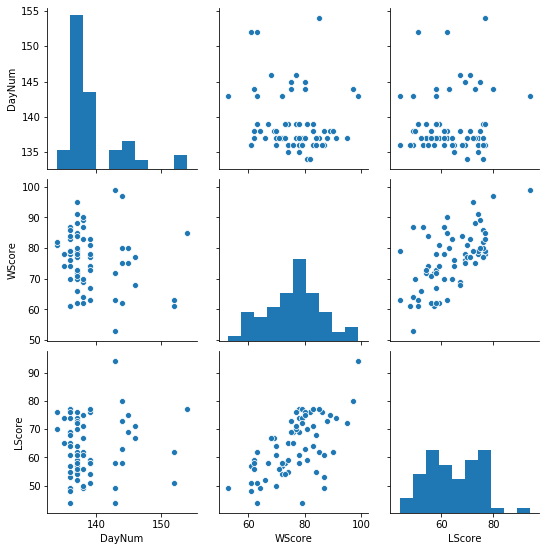

In [237]:
plt.figure(figsize = (10, 10))
sns.pairplot(df_results_compact[df_results_compact.Season == 2019].loc[:, ['DayNum', 'WScore', 'LScore']], diag_kind = 'hist')
plt.show()

# Model 1

Let's try using previous matchups between teams. Look at their point differential. The wider, the more likely we think it is that they will win. If there is a new matchup, then random guess.

In [238]:
results = df_results_compact.loc[:, 'Season' : 'LScore']
results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,136,1116,63,1234,54
1,1985,136,1120,59,1345,58
2,1985,136,1207,68,1250,43
3,1985,136,1229,58,1425,55
4,1985,136,1242,49,1325,38
...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71
2247,2019,146,1277,68,1181,67
2248,2019,152,1403,61,1277,51
2249,2019,152,1438,63,1120,62


In [239]:
teams.set_index('TeamID', inplace = True)
teams = teams.TeamName.T
team_key = teams.to_dict()
team_key

{1101: 'Abilene Chr',
 1102: 'Air Force',
 1103: 'Akron',
 1104: 'Alabama',
 1105: 'Alabama A&M',
 1106: 'Alabama St',
 1107: 'SUNY Albany',
 1108: 'Alcorn St',
 1109: 'Alliant Intl',
 1110: 'American Univ',
 1111: 'Appalachian St',
 1112: 'Arizona',
 1113: 'Arizona St',
 1114: 'Ark Little Rock',
 1115: 'Ark Pine Bluff',
 1116: 'Arkansas',
 1117: 'Arkansas St',
 1118: 'Armstrong St',
 1119: 'Army',
 1120: 'Auburn',
 1121: 'Augusta',
 1122: 'Austin Peay',
 1123: 'Ball St',
 1124: 'Baylor',
 1125: 'Belmont',
 1126: 'Bethune-Cookman',
 1127: 'Binghamton',
 1128: 'Birmingham So',
 1129: 'Boise St',
 1130: 'Boston College',
 1131: 'Boston Univ',
 1132: 'Bowling Green',
 1133: 'Bradley',
 1134: 'Brooklyn',
 1135: 'Brown',
 1136: 'Bryant',
 1137: 'Bucknell',
 1138: 'Buffalo',
 1139: 'Butler',
 1140: 'BYU',
 1141: 'C Michigan',
 1142: 'Cal Poly',
 1143: 'California',
 1144: 'Campbell',
 1145: 'Canisius',
 1146: 'Cent Arkansas',
 1147: 'Centenary',
 1148: 'Central Conn',
 1149: 'Charleston So',

In [240]:
# results.WTeamID = results.WTeamID.map(team_key)
# results.LTeamID = results.LTeamID.map(team_key)
# results

Let's pass in the team names instead of the numbers. That will look better.

# Feature Generation

1. Total Point Differential in that matchup (If teams haven't played before, set to zero)
2. Number of tournament games
3. 

In [241]:
results.dtypes

Season     int64
DayNum     int64
WTeamID    int64
WScore     int64
LTeamID    int64
LScore     int64
dtype: object

In [242]:
def matchup(row):
    if row.WTeamID < row.LTeamID:
        return f'{row.WTeamID}_{row.LTeamID}'
    else:
        return f'{row.LTeamID}_{row.WTeamID}'

results['Matchup'] = results.apply(matchup, axis = 'columns')
results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Matchup
0,1985,136,1116,63,1234,54,1116_1234
1,1985,136,1120,59,1345,58,1120_1345
2,1985,136,1207,68,1250,43,1207_1250
3,1985,136,1229,58,1425,55,1229_1425
4,1985,136,1242,49,1325,38,1242_1325
...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,1120_1246
2247,2019,146,1277,68,1181,67,1181_1277
2248,2019,152,1403,61,1277,51,1277_1403
2249,2019,152,1438,63,1120,62,1120_1438


In [251]:
# def order_scores(row):
#     if row.WTeamID > row.LTeamID:
#         row.WTeamID, row.LTeamID = row.LTeamID, row.WTeamID
        
#     return row
        
# display(results.apply(order_scores , axis = 'columns'))

In [252]:
results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Matchup,Point_Diff
0,1985,136,1116,63,1234,54,1116_1234,9
1,1985,136,1120,59,1345,58,1120_1345,1
2,1985,136,1207,68,1250,43,1207_1250,25
3,1985,136,1229,58,1425,55,1229_1425,3
4,1985,136,1242,49,1325,38,1242_1325,11
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,1120_1246,6
2247,2019,146,1277,68,1181,67,1181_1277,1
2248,2019,152,1403,61,1277,51,1277_1403,10
2249,2019,152,1438,63,1120,62,1120_1438,1


In [245]:
def point_diff(row):
    if row.WTeamID > row.LTeamID:
        return row.

results['Point_Diff'] = 

In [246]:
results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Matchup,Point_Diff
0,1985,136,1116,63,1234,54,1116_1234,9
1,1985,136,1120,59,1345,58,1120_1345,1
2,1985,136,1207,68,1250,43,1207_1250,25
3,1985,136,1229,58,1425,55,1229_1425,3
4,1985,136,1242,49,1325,38,1242_1325,11
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,1120_1246,6
2247,2019,146,1277,68,1181,67,1181_1277,1
2248,2019,152,1403,61,1277,51,1277_1403,10
2249,2019,152,1438,63,1120,62,1120_1438,1


Need to compare matchups with reversed order.

In [247]:
results.Matchup.value_counts()[results.Matchup.value_counts() == 1]

1163_1185    1
1372_1433    1
1242_1299    1
1277_1400    1
1280_1462    1
            ..
1199_1293    1
1239_1396    1
1264_1438    1
1196_1326    1
1163_1206    1
Name: Matchup, Length: 1705, dtype: int64

In [248]:
results.Matchup.value_counts()[results.Matchup.value_counts() != 1]

1181_1277    6
1181_1242    6
1314_1437    6
1116_1314    6
1246_1428    6
            ..
1266_1393    2
1246_1277    2
1210_1329    2
1172_1246    2
1246_1437    2
Name: Matchup, Length: 239, dtype: int64

In [249]:
results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Matchup,Point_Diff
0,1985,136,1116,63,1234,54,1116_1234,9
1,1985,136,1120,59,1345,58,1120_1345,1
2,1985,136,1207,68,1250,43,1207_1250,25
3,1985,136,1229,58,1425,55,1229_1425,3
4,1985,136,1242,49,1325,38,1242_1325,11
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,1120_1246,6
2247,2019,146,1277,68,1181,67,1181_1277,1
2248,2019,152,1403,61,1277,51,1277_1403,10
2249,2019,152,1438,63,1120,62,1120_1438,1
